# Xavier Obezo - Fitting Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from scipy.optimize import curve_fit

# Power on the Moon

<img src="images/ApolloRTG.jpg" alt="Apollo_ALSEP_RTG" style="width: 500px;"/>

----

* The Apollo lunar mission deployed a series of experiments on the Moon.
* The experiment package was called the Apollo Lunar Surface Experiments Package [(ALSEP)](https://en.wikipedia.org/wiki/Apollo_Lunar_Surface_Experiments_Package)
* The ALSEP was powered by a radioisotope thermoelectric generator [(RTG)](https://en.wikipedia.org/wiki/Radioisotope_thermoelectric_generator)

----

* An RTG is basically a fist-sized slug of Pu-238 wrapped in a material that generates electric power when heated.
* Since the RTG is powered by a radioisotope, the output power decreases over time as the radioisotope decays.

## Read in the datafile

The data file `/Data/Apollo_RTG.csv` contains the power output of the Apollo 12 RTG as a function of time.

The data colunms are

* [Day] - Days on the Moon
* [Power] - RTG power output in Watts

In [2]:
rtg = pd.read_csv('./Data/Apollo_RTG.csv')

## Plot the Data

* Day vs. Power
* Use the OO interface to matplotlib
* Fit the function with a polynomial (degree >= 3)
* Plot the fit with the data
- Output size w:11in, h:8.5in
- Make the plot look nice (including clear labels)

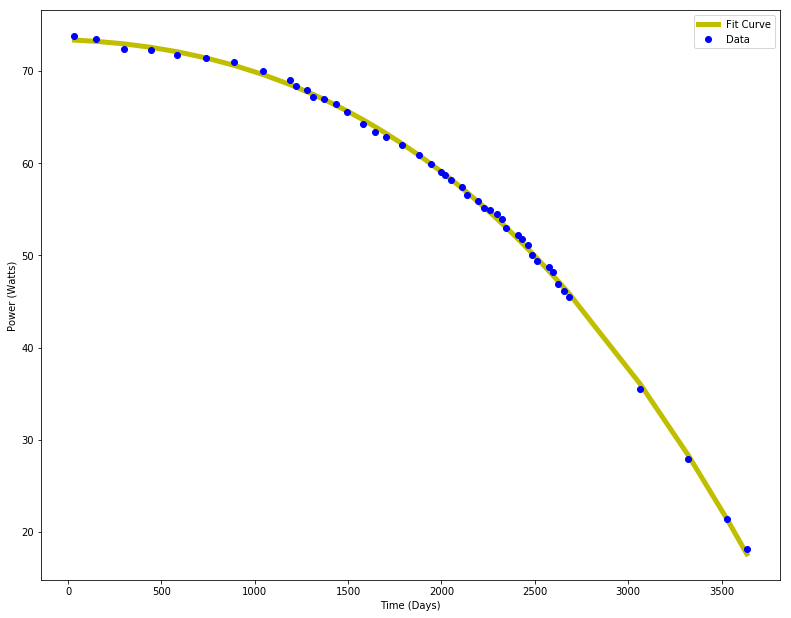

In [3]:
#Graph Setup
fig,ax = plt.subplots(1,1)
fig.set_size_inches(11,8.5)
fig.tight_layout()

#Fitted Curve
my_fit = np.polyfit(rtg['Day'], rtg['Power'], 3)
my_fit
fitted_polynomial = np.poly1d(my_fit)

#Labels
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Power (Watts)")

#Plots
#  Fitted Line
ax.plot(rtg['Day'], fitted_polynomial(rtg['Day']),
        linewidth=5, color='y', linestyle='-',
        label="Fit Curve");
#  Real Data
ax.plot(rtg['Day'], rtg['Power'], color = "b",
        marker="o",linestyle="None",markersize=6, label="Data");

#  Legend location
ax.legend(loc=0);

## Power over time

* All of your answer should be formatted as sentences
* For example: `The power on day 0 is VALUE Watts`

### 1 - What was the power output on Day 0?

In [4]:
answer1 = fitted_polynomial(0)
print("Its starting output was {0:.2f} Watts.".format(answer1))

Its starting output was 73.40 Watts.


### 2 - How many years after landing could you still power a 60 W lightbulb?

In [5]:
def find_wattage(function, wattage):
    zeroes = (function-wattage).roots.real
    mask = np.where(zeroes>0)
    return zeroes[mask][0]

answer2 = find_wattage(fitted_polynomial,60)/365
print("It would take about {0:.2f} years before you couldn't power a 60 watt lightbulb.".format(answer2))

It would take about 5.31 years before you couldn't power a 60 watt lightbulb.


### 3 - How many years after landing could you still power a 5 W USB device?

In [6]:
answer3 = find_wattage(fitted_polynomial,5)/365
print("It would take about {0:.2f} years before you couldn't power a 5 Watt USB port.".format(answer3))

It would take about 10.85 years before you couldn't power a 5 Watt USB port.


### 4 - How many years after landing until the power output is 0 W?

In [7]:
answer4 = find_wattage(fitted_polynomial,0)/365
print("It would take about {0:.2f} years before the power would run out.".format(answer4))

It would take about 11.17 years before the power would run out.


---

# Fitting data to a function

* The datafile `./Data/linedata.csv` contains two columns of data
* Use the OO interface to matplotlib
* Plot the data (with labels!)
* Fit the function below to the data
* Find the values `(A,C,W)` that best fit the data
- Output size w:11in, h:8.5in
- Make the plot look nice (including clear labels)

----

#### Fit a gaussian of the form:

$$ \Large f(x) = A e^{-\frac{(x - C)^2}{W}} $$

* A = amplitude of the gaussian
* C = x-value of the central peak of the gaussian
* W = width of the gaussian


In [8]:
line = pd.read_csv('./Data/linedata.csv')

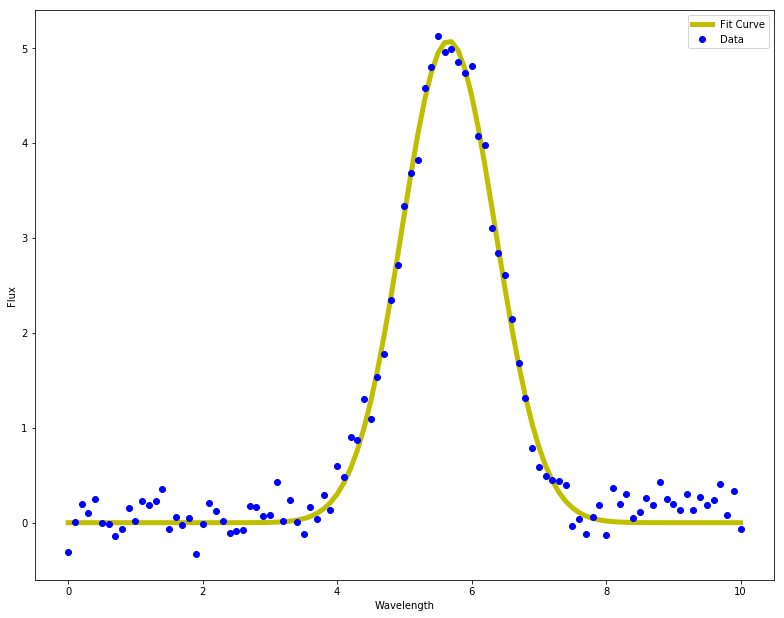

In [9]:
#Gassian function
def f(x,A,C,W):
    return A*np.e**(-(x-C)**2/W)
# Order of guesses:
#           A    C    W
guesses = [5.1, 5.1, 2.5]
fitpars, error = curve_fit(f,line['wavelength'], line['flux'],p0=guesses)

#Graph Setup
fig,ax = plt.subplots(1,1)
fig.set_size_inches(11,8.5)
fig.tight_layout()

#Labels
ax.set_xlabel("Wavelength")
ax.set_ylabel("Flux")

#Plots
#  Fitted Line
ax.plot(line['wavelength'], f(line['wavelength'],*fitpars),
        linewidth=5, color='y', linestyle='-',
        label="Fit Curve");
#  Real Data
ax.plot(line['wavelength'], line['flux'], color = "b",
        marker="o",linestyle="None",markersize=6, label="Data");

#  Legend location
ax.legend(loc=0);

### Due Mon Feb 25 - 1 pm
- `Make sure to change the filename to your name!`
- `Make sure to change the Title to your name!`
- `File -> Download as -> HTML (.html)`
- `upload your .html and .ipynb file to the class Canvas page`

----

# <font color=blue>Ravenclaw</font>

#### The file `./Data/StarData.csv` is a spectra of a main sequence star

* Col 1 - Wavelength `[angstroms]`
* Col 2 - Flux `[normalized to 0->1]`

#### Read in the Data

In [10]:
from scipy.interpolate import UnivariateSpline
data = pd.read_csv('./Data/StarData.csv')

#### Plot the Data

* Use the OO interface to matplotlib
* Output size w:11in, h:8.5in
* Make the plot look nice (including clear labels and a legend)

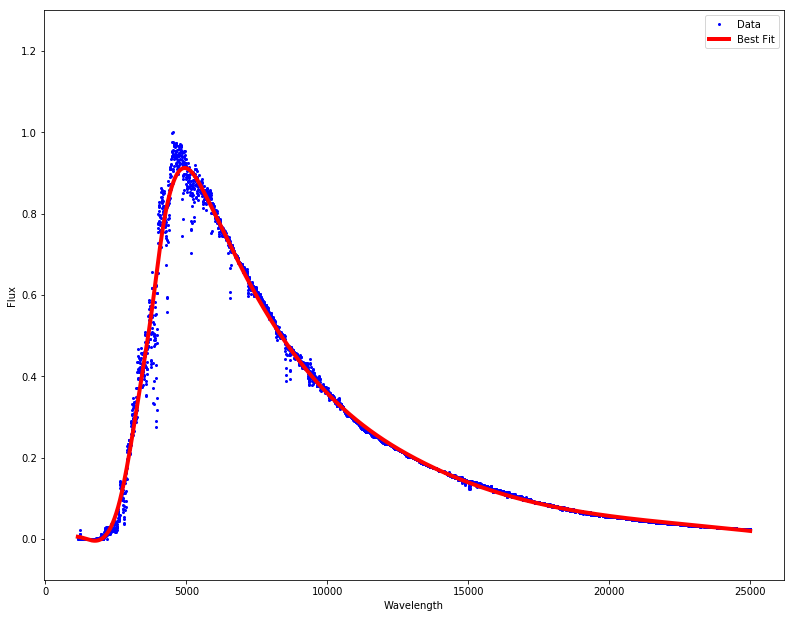

In [11]:
#Graph Setup
fig,ax = plt.subplots(1,1)
fig.set_size_inches(11,8.5)
fig.tight_layout()
ax.set_ylim(-0.1,1.3)

#Labels
ax.set_xlabel("Wavelength")
ax.set_ylabel("Flux")

#Function
my_spline = UnivariateSpline(data['wavelength'], data['flux'], s=3)

#Plots
#  Real Data
ax.plot(data['wavelength'], data['flux'], color = "b",
        marker="o",linestyle="None",markersize=2, label="Data");
#  Function Plot
ax.plot(data['wavelength'], my_spline(data['wavelength']),
        color="r", marker="None",
        linestyle="-", linewidth=4,
        label = "Best Fit")
#  Legend location
ax.legend(loc=0);

#### Use [Wien's law](https://en.wikipedia.org/wiki/Wien%27s_displacement_law) to determine the temperature of the Star

In [12]:
from astropy import units as u
from astropy import constants as const
from scipy.optimize import fmin

In [13]:
def Wiens_Law(Max_Wavelength):
    b = (2.8977729 *10**-3) * u.m*u.K
    temp = b/Max_Wavelength
    return temp.decompose()
#I don't know how to supress the output
flippedfunction = UnivariateSpline(data['wavelength'], -data['flux'], s=3);
maxPoint = fmin(flippedfunction,3000);
maxPoint = (maxPoint[0] *10**(-10)) *u.m
Temp = Wiens_Law(maxPoint)
print("\n\nThe tempurature of the star is {0:.1f}.".format(Temp))

Optimization terminated successfully.
         Current function value: -0.912569
         Iterations: 28
         Function evaluations: 56


The tempurature of the star is 5867.3 K.


#### Plank's Law

* [Plank's Law](https://en.wikipedia.org/wiki/Planck%27s_law) describes the spectra emitted by a blackbody at a temperature T
* Calculated the blackbody flux at the above temperature at all of your data_wavelength points
* Scale the blackbody flux to `[0->1]`

In [14]:
def Planks_eq(wavelength,temp):
    wavelength = wavelength*10**(-10) * u.m
    #from the wiki page there are two fractions. To make this easier for me to read I'm
    #  going to break up the equation into those two parts
    p1 = 2*const.h*const.c**2/(wavelength**5)
    p2 = np.e**(const.h*const.c/(wavelength*const.k_B*temp)).value-1
    answer = p1/p2
    return answer
#Stealing this from you
def normalize_data(data_array):
    result = (data_array - data_array.min()) / (data_array.max() - data_array.min())
    return result
yBlackBody = normalize_data(Planks_eq(data['wavelength'],Temp).value)

#### Plot the Data and the Blackbody fit on the same plot

* Use the OO interface to matplotlib
* Output size w:11in, h:8.5in
* Make the plot look nice (including clear labels and a legend)

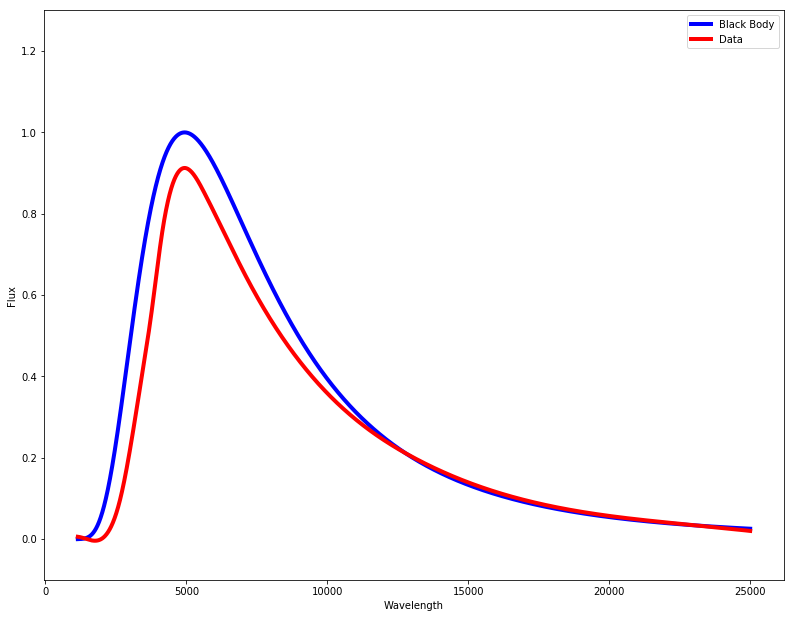

In [15]:
#Graph Setup
fig,ax = plt.subplots(1,1)
fig.set_size_inches(11,8.5)
fig.tight_layout()
ax.set_ylim(-0.1,1.3)

#Labels
ax.set_xlabel("Wavelength")
ax.set_ylabel("Flux")

#Plots
#  Black Body
ax.plot(data['wavelength'], yBlackBody, color = "b",
        marker="None",linestyle="-", linewidth=4, label="Black Body");
#  Function Plot
ax.plot(data['wavelength'], my_spline(data['wavelength']),
        color="r", marker="None",
        linestyle="-", linewidth=4,
        label = "Data")
#  Legend location
ax.legend(loc=0);